In [1]:
from los_simulation import *

Importing los_simulation.simulations
It took 0.753554 s to import los_simulation.simulations
It took 0.753821 s to import all of the active modules


In [2]:
# define a receiver node with a specified location, direction and antenna pattern
# Here we start at the origin and point in the y direction, with a simple directional pattern
rx = RxNode(location=[0,0],direction=[0,1],antenna_pattern=simple_directional_gain)

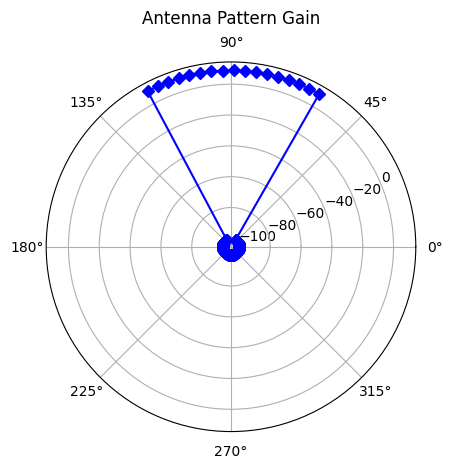

In [3]:
# visualize the antenna pattern 
rx.plot_antenna_pattern()

In [4]:
# create a transmitter node (put 1km away in the x-drection,pointed towards +y with an omnidirectional antenna pattern and relative power of 20 dB)
tx = TxNode(location=[1000,0],direction=[0,1],antenna_pattern=omni,power=20)

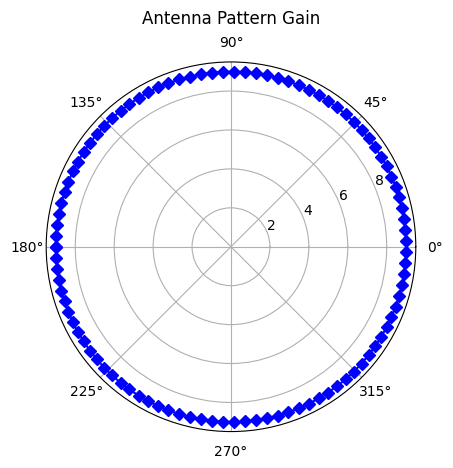

In [5]:
#visualize the antenna pattern 
tx.plot_antenna_pattern()

In [6]:
# now for a specific wavelength (frequency) we can calculate the power at the rx, C is the speed of light
# power at 4 GHz
node_to_node_power(rx,tx,wavelength=C/4e9)

NameError: name 'C' is not defined

In [ ]:
# if you notice this is a very small relative power. That is because the rx is a directional antenna pointing away from the tx
# if change the direction to point to the tx we can get a much higher power
rx.direction = [1,0]
node_to_node_power(rx,tx,wavelength=C/4e9)

c:\Users\sandersa\VSCode Repos\los_simulation\los_simulation\simulations.py:127: RuntimeWarning: invalid value encountered in scalar divide
  inverse_cos =  np.arccos((x1*x2+y1*y2)/(mag_a*mag_b))


np.float64(-66.48898304844262)

In [ ]:
# and loss is strongly influenced by f (increases as f^2)
node_to_node_power(rx,tx,wavelength=C/1e9)

c:\Users\sandersa\VSCode Repos\los_simulation\los_simulation\simulations.py:127: RuntimeWarning: invalid value encountered in scalar divide
  inverse_cos =  np.arccos((x1*x2+y1*y2)/(mag_a*mag_b))


np.float64(-54.44778322188337)

c:\Users\sandersa\VSCode Repos\los_simulation\los_simulation\simulations.py:127: RuntimeWarning: invalid value encountered in scalar divide
  inverse_cos =  np.arccos((x1*x2+y1*y2)/(mag_a*mag_b))


Text(0.5, 1.0, 'Power as a Function of Distance at 3 GHz')

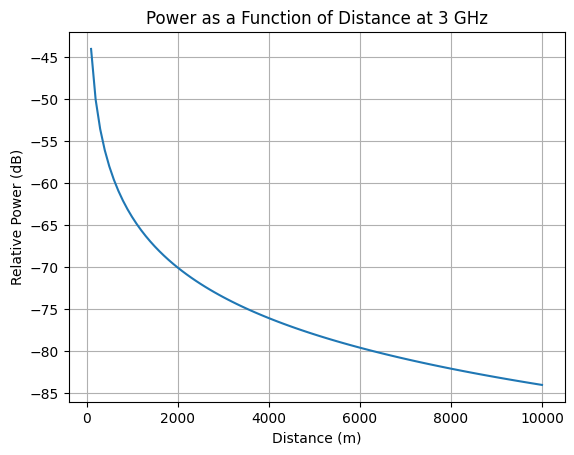

In [ ]:
# power as a function of distance is easy this is at 3 GHz
distances = np.linspace(100,10000,100)
powers = []
for distance in distances:
    tx.location = [distance,0]
    power = node_to_node_power(rx,tx,wavelength=C/3e9)
    powers.append(power)
plt.plot(distances,powers)
plt.xlabel("Distance (m)")
plt.ylabel("Relative Power (dB)")
plt.grid()
plt.title("Power as a Function of Distance at 3 GHz")

In [ ]:
# if you want to do a number of txs you can find the total by transforming to linear units and then summing
# Here we have number of transmitters around a circle
txs = []
number_transmitters =11
tx_distance = 1000
tx_angles = np.linspace(-np.pi,np.pi,number_transmitters)
for i,angle in enumerate(tx_angles):
    location = [tx_distance*np.cos(angle),tx_distance*np.sin(angle)]
    new_tx = TxNode(location=location,direction = [0,1],antenna_pattern = omni, power = -10, id=f"tx_{i}")
    txs.append(new_tx)
# power at 2 GHz
power_list_rx = np.array(list(map(lambda x: node_to_node_power(rx,x,wavelength = C/2e9),txs)))
labels = list(map(lambda x: x.id,txs))
total_power_rx = 10*np.log10(np.sum(10**(power_list_rx/10)))


NameError: name 'np' is not defined